In [1]:
#encoding:utf8
import os
os.chdir("G:\\Anaconda3\\Scripts\\lecture01\\Feature_engineering_and_model_tuning\\Feature-engineering_and_Parameter_Tuning_XGBoost")
print (os.getcwd())

G:\Anaconda3\Scripts\lecture01\Feature_engineering_and_model_tuning\Feature-engineering_and_Parameter_Tuning_XGBoost


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
#载入数据:
train = pd.read_csv('Train.csv',encoding = "ISO-8859-1")
test = pd.read_csv('Test.csv',encoding = "ISO-8859-1")

In [4]:
train.shape, test.shape

((87020, 26), (37717, 24))

In [5]:
#看看数据的基本情况
train.dtypes

ID                        object
Gender                    object
City                      object
Monthly_Income             int64
DOB                       object
Lead_Creation_Date        object
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
Employer_Name             object
Salary_Account            object
Mobile_Verified           object
Var5                       int64
Var1                      object
Loan_Amount_Submitted    float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
Processing_Fee           float64
EMI_Loan_Submitted       float64
Filled_Form               object
Device_Type               object
Var2                      object
Source                    object
Var4                       int64
LoggedIn                   int64
Disbursed                  int64
dtype: object

In [6]:
#拿前5条出来看看
train.head(5)

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


In [7]:
#合成一个总的data
train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)
data.shape

(124737, 27)

In [8]:
#数据应用/建模一个很重要的工作是，你要看看异常点，比如说缺省值¶

In [9]:
data.apply(lambda x: sum(x.isnull()))

City                      1401
DOB                          0
Device_Type                  0
Disbursed                37717
EMI_Loan_Submitted       84901
Employer_Name              113
Existing_EMI               111
Filled_Form                  0
Gender                       0
ID                           0
Interest_Rate            84901
Lead_Creation_Date           0
Loan_Amount_Applied        111
Loan_Amount_Submitted    49535
Loan_Tenure_Applied        111
Loan_Tenure_Submitted    49535
LoggedIn                 37717
Mobile_Verified              0
Monthly_Income               0
Processing_Fee           85346
Salary_Account           16801
Source                       0
Var1                         0
Var2                         0
Var4                         0
Var5                         0
source                       0
dtype: int64

In [10]:
#要对数据有更深的认识，比如说，咱们看看这些字段，分别有多少种取值(甚至你可以看看分布)

In [11]:
var = ['Gender','Salary_Account','Mobile_Verified','Var1','Filled_Form','Device_Type','Var2','Source']
for v in var:
    print ('\n%s这一列数据的不同取值和出现的次数\n'%v)
    print (data[v].value_counts())


Gender这一列数据的不同取值和出现的次数

Male      71398
Female    53339
Name: Gender, dtype: int64

Salary_Account这一列数据的不同取值和出现的次数

HDFC Bank                                          25180
ICICI Bank                                         19547
State Bank of India                                17110
Axis Bank                                          12590
Citibank                                            3398
Kotak Bank                                          2955
IDBI Bank                                           2213
Punjab National Bank                                1747
Bank of India                                       1713
Bank of Baroda                                      1675
Standard Chartered Bank                             1434
Canara Bank                                         1385
Union Bank of India                                 1330
Yes Bank                                            1120
ING Vysya                                            996
Corporation bank            

In [12]:
#紧接着你就可以开始处理你的字段(特征)了
#我这里只做了一些简单的处理，你大可在我的基础上做更复杂的特征处理

In [13]:
#City字段处理
len(data['City'].unique())

724

In [14]:
#好像city的类型好多，粗暴一点，这个字段咱们不要了
data.drop('City',axis=1,inplace=True)

In [15]:
#DOB字段处理
#DOB是出生的具体日期，咱们要具体日期作用没那么大，年龄段可能对我们有用，所有算一下年龄好了

In [16]:
data['DOB'].head()

0    23-May-78
1    07-Oct-85
2    10-Oct-81
3    30-Nov-87
4    17-Feb-84
Name: DOB, dtype: object

In [17]:
#创建一个年龄的字段Age
data['Age'] = data['DOB'].apply(lambda x: 115 - int(x[-2:]))
data['Age'].head()

0    37
1    30
2    34
3    28
4    31
Name: Age, dtype: int64

In [18]:
#把原始的DOB字段去掉:
data.drop('DOB',axis=1,inplace=True)

In [19]:
#EMI_Load_Submitted字段处理¶

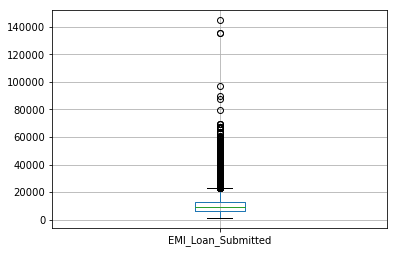

In [20]:
data.boxplot(column=['EMI_Loan_Submitted'],return_type='axes')

In [21]:
#好像缺失值比较多，干脆就开一个新的字段，表明是缺失值还是不是缺失值
data['EMI_Loan_Submitted_Missing'] = data['EMI_Loan_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data[['EMI_Loan_Submitted','EMI_Loan_Submitted_Missing']].head(10)

,EMI_Loan_Submitted,EMI_Loan_Submitted_Missing
0,NaN,1
1,6762.90,0
2,NaN,1
3,NaN,1
4,NaN,1
5,6978.92,0
6,NaN,1
7,NaN,1
8,30824.65,0
9,10883.38,0


In [22]:
#原始那一列就可以不要了
data.drop('EMI_Loan_Submitted',axis=1,inplace=True)

In [23]:
#Employer Name字段处理
#看看个数

In [24]:
len(data['Employer_Name'].value_counts())

57193

In [25]:
#不看也知道，每个人都有一个名字，太多了，懒癌晚期的同学直接drop掉了

In [26]:
#丢掉
data.drop('Employer_Name',axis=1,inplace=True)

In [27]:
#Existing_EMI字段

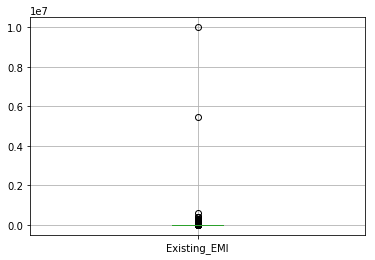

In [28]:
data.boxplot(column='Existing_EMI',return_type='axes')

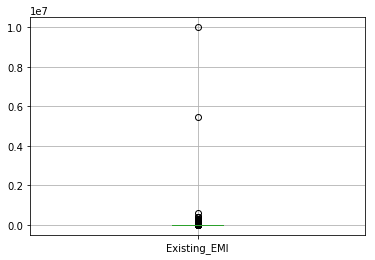

In [29]:
data.boxplot(column='Existing_EMI',return_type='axes')

In [30]:
#缺省值不多，用均值代替
data['Existing_EMI'].fillna(0, inplace=True)

In [31]:
#Interest_Rate字段:

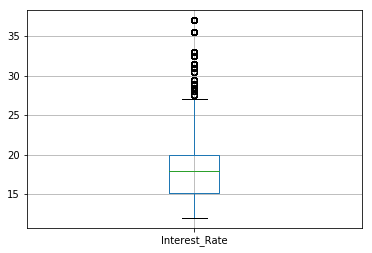

In [32]:
data.boxplot(column=['Interest_Rate'],return_type='axes')

In [33]:
#缺省值太多，也造一个字段，表示有无
data['Interest_Rate_Missing'] = data['Interest_Rate'].apply(lambda x: 1 if pd.isnull(x) else 0)
print (data[['Interest_Rate','Interest_Rate_Missing']].head(10))

   Interest_Rate  Interest_Rate_Missing
0            NaN                      1
1          13.25                      0
2            NaN                      1
3            NaN                      1
4            NaN                      1
5          13.99                      0
6            NaN                      1
7            NaN                      1
8          14.85                      0
9          18.25                      0


In [34]:
data.drop('Interest_Rate',axis=1,inplace=True)

In [35]:
#Lead Creation Date字段

In [36]:
#不！要！了！，是的，不要了！！！
data.drop('Lead_Creation_Date',axis=1,inplace=True)
data.head()

,Device_Type,Disbursed,Existing_EMI,Filled_Form,Gender,ID,Loan_Amount_Applied,Loan_Amount_Submitted,Loan_Tenure_Applied,Loan_Tenure_Submitted,...,Salary_Account,Source,Var1,Var2,Var4,Var5,source,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing
0,Web-browser,0.0,0.0,N,Female,ID000002C20,300000.0,NaN,5.0,NaN,...,HDFC Bank,S122,HBXX,G,1,0,train,37,1,1
1,Web-browser,0.0,0.0,N,Male,ID000004E40,200000.0,200000.0,2.0,2.0,...,ICICI Bank,S122,HBXA,G,3,13,train,30,0,0
2,Web-browser,0.0,0.0,N,Male,ID000007H20,600000.0,450000.0,4.0,4.0,...,State Bank of India,S143,HBXX,B,1,0,train,34,1,1
3,Web-browser,0.0,0.0,N,Male,ID000008I30,1000000.0,920000.0,5.0,5.0,...,State Bank of India,S143,HBXX,B,3,10,train,28,1,1
4,Web-browser,0.0,25000.0,N,Male,ID000009J40,500000.0,500000.0,2.0,2.0,...,HDFC Bank,S134,HBXX,B,3,17,train,31,1,1


In [37]:
#Loan Amount and Tenure applied字段¶

In [38]:
#找中位数去填补缺省值（因为缺省的不多）
data['Loan_Amount_Applied'].fillna(data['Loan_Amount_Applied'].median(),inplace=True)
data['Loan_Tenure_Applied'].fillna(data['Loan_Tenure_Applied'].median(),inplace=True)

In [39]:
data.head()

,Device_Type,Disbursed,Existing_EMI,Filled_Form,Gender,ID,Loan_Amount_Applied,Loan_Amount_Submitted,Loan_Tenure_Applied,Loan_Tenure_Submitted,...,Salary_Account,Source,Var1,Var2,Var4,Var5,source,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing
0,Web-browser,0.0,0.0,N,Female,ID000002C20,300000.0,NaN,5.0,NaN,...,HDFC Bank,S122,HBXX,G,1,0,train,37,1,1
1,Web-browser,0.0,0.0,N,Male,ID000004E40,200000.0,200000.0,2.0,2.0,...,ICICI Bank,S122,HBXA,G,3,13,train,30,0,0
2,Web-browser,0.0,0.0,N,Male,ID000007H20,600000.0,450000.0,4.0,4.0,...,State Bank of India,S143,HBXX,B,1,0,train,34,1,1
3,Web-browser,0.0,0.0,N,Male,ID000008I30,1000000.0,920000.0,5.0,5.0,...,State Bank of India,S143,HBXX,B,3,10,train,28,1,1
4,Web-browser,0.0,25000.0,N,Male,ID000009J40,500000.0,500000.0,2.0,2.0,...,HDFC Bank,S134,HBXX,B,3,17,train,31,1,1


In [40]:
#Loan Amount and Tenure selected¶

In [41]:
# 缺省值太多。。。是否缺省。。。
data['Loan_Amount_Submitted_Missing'] = data['Loan_Amount_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data['Loan_Tenure_Submitted_Missing'] = data['Loan_Tenure_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)

In [42]:
data.head()

,Device_Type,Disbursed,Existing_EMI,Filled_Form,Gender,ID,Loan_Amount_Applied,Loan_Amount_Submitted,Loan_Tenure_Applied,Loan_Tenure_Submitted,...,Var1,Var2,Var4,Var5,source,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing
0,Web-browser,0.0,0.0,N,Female,ID000002C20,300000.0,NaN,5.0,NaN,...,HBXX,G,1,0,train,37,1,1,1,1
1,Web-browser,0.0,0.0,N,Male,ID000004E40,200000.0,200000.0,2.0,2.0,...,HBXA,G,3,13,train,30,0,0,0,0
2,Web-browser,0.0,0.0,N,Male,ID000007H20,600000.0,450000.0,4.0,4.0,...,HBXX,B,1,0,train,34,1,1,0,0
3,Web-browser,0.0,0.0,N,Male,ID000008I30,1000000.0,920000.0,5.0,5.0,...,HBXX,B,3,10,train,28,1,1,0,0
4,Web-browser,0.0,25000.0,N,Male,ID000009J40,500000.0,500000.0,2.0,2.0,...,HBXX,B,3,17,train,31,1,1,0,0


In [43]:
#原来的字段就没用了
data.drop(['Loan_Amount_Submitted','Loan_Tenure_Submitted'],axis=1,inplace=True)

In [44]:
#LoggedIn¶

In [45]:
#没想好怎么用。。。不要了。。。
data.drop('LoggedIn',axis=1,inplace=True)

In [46]:
#salary account¶

In [47]:
# 可能对接多个银行，所以也不要了
data.drop('Salary_Account',axis=1,inplace=True)

In [48]:
#Processing_Fee¶

In [49]:
#和之前一样的处理，有或者没有
data['Processing_Fee_Missing'] = data['Processing_Fee'].apply(lambda x: 1 if pd.isnull(x) else 0)
#旧的字段不要了
data.drop('Processing_Fee',axis=1,inplace=True)

In [50]:
#Source

In [51]:
data['Source'] = data['Source'].apply(lambda x: 'others' if x not in ['S122','S133'] else x)
data['Source'].value_counts()

S122      55249
S133      42900
others    26588
Name: Source, dtype: int64

In [52]:
#最终的数据样式

In [53]:
data.head()

,Device_Type,Disbursed,Existing_EMI,Filled_Form,Gender,ID,Loan_Amount_Applied,Loan_Tenure_Applied,Mobile_Verified,Monthly_Income,...,Var2,Var4,Var5,source,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing,Processing_Fee_Missing
0,Web-browser,0.0,0.0,N,Female,ID000002C20,300000.0,5.0,N,20000,...,G,1,0,train,37,1,1,1,1,1
1,Web-browser,0.0,0.0,N,Male,ID000004E40,200000.0,2.0,Y,35000,...,G,3,13,train,30,0,0,0,0,1
2,Web-browser,0.0,0.0,N,Male,ID000007H20,600000.0,4.0,Y,22500,...,B,1,0,train,34,1,1,0,0,1
3,Web-browser,0.0,0.0,N,Male,ID000008I30,1000000.0,5.0,Y,35000,...,B,3,10,train,28,1,1,0,0,1
4,Web-browser,0.0,25000.0,N,Male,ID000009J40,500000.0,2.0,Y,100000,...,B,3,17,train,31,1,1,0,0,1


In [54]:
data.describe()

,Disbursed,Existing_EMI,Loan_Amount_Applied,Loan_Tenure_Applied,Monthly_Income,Var4,Var5,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing,Processing_Fee_Missing
count,87020.000000,1.247370e+05,1.247370e+05,124737.000000,1.247370e+05,124737.000000,124737.000000,124737.000000,124737.000000,124737.000000,124737.000000,124737.000000,124737.000000
mean,0.014629,3.633107e+03,2.298744e+05,2.138075,5.309073e+04,2.950560,4.964774,30.906996,0.680640,0.680640,0.397116,0.397116,0.684208
std,0.120062,3.367642e+04,3.539938e+05,2.014874,1.823394e+06,1.695261,5.669784,7.137860,0.466231,0.466231,0.489302,0.489302,0.464833
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,1.650000e+04,1.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000e+00,1.000000e+05,2.000000,2.500000e+04,3.000000,2.000000,29.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,0.000000,3.500000e+03,3.000000e+05,4.000000,4.000000e+04,5.000000,11.000000,34.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000e+07,1.500000e+07,10.000000,4.445544e+08,7.000000,18.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
data.apply(lambda x: sum(x.isnull()))

Device_Type                          0
Disbursed                        37717
Existing_EMI                         0
Filled_Form                          0
Gender                               0
ID                                   0
Loan_Amount_Applied                  0
Loan_Tenure_Applied                  0
Mobile_Verified                      0
Monthly_Income                       0
Source                               0
Var1                                 0
Var2                                 0
Var4                                 0
Var5                                 0
source                               0
Age                                  0
EMI_Loan_Submitted_Missing           0
Interest_Rate_Missing                0
Loan_Amount_Submitted_Missing        0
Loan_Tenure_Submitted_Missing        0
Processing_Fee_Missing               0
dtype: int64

In [56]:
data.dtypes

Device_Type                       object
Disbursed                        float64
Existing_EMI                     float64
Filled_Form                       object
Gender                            object
ID                                object
Loan_Amount_Applied              float64
Loan_Tenure_Applied              float64
Mobile_Verified                   object
Monthly_Income                     int64
Source                            object
Var1                              object
Var2                              object
Var4                               int64
Var5                               int64
source                            object
Age                                int64
EMI_Loan_Submitted_Missing         int64
Interest_Rate_Missing              int64
Loan_Amount_Submitted_Missing      int64
Loan_Tenure_Submitted_Missing      int64
Processing_Fee_Missing             int64
dtype: object

In [57]:
#数值编码¶

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_to_encode = ['Device_Type','Filled_Form','Gender','Var1','Var2','Mobile_Verified','Source']
for col in var_to_encode:
    data[col] = le.fit_transform(data[col])

In [59]:
data.head()

,Device_Type,Disbursed,Existing_EMI,Filled_Form,Gender,ID,Loan_Amount_Applied,Loan_Tenure_Applied,Mobile_Verified,Monthly_Income,...,Var2,Var4,Var5,source,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing,Processing_Fee_Missing
0,1,0.0,0.0,0,0,ID000002C20,300000.0,5.0,0,20000,...,6,1,0,train,37,1,1,1,1,1
1,1,0.0,0.0,0,1,ID000004E40,200000.0,2.0,1,35000,...,6,3,13,train,30,0,0,0,0,1
2,1,0.0,0.0,0,1,ID000007H20,600000.0,4.0,1,22500,...,1,1,0,train,34,1,1,0,0,1
3,1,0.0,0.0,0,1,ID000008I30,1000000.0,5.0,1,35000,...,1,3,10,train,28,1,1,0,0,1
4,1,0.0,25000.0,0,1,ID000009J40,500000.0,2.0,1,100000,...,1,3,17,train,31,1,1,0,0,1


In [60]:
data.dtypes

Device_Type                        int64
Disbursed                        float64
Existing_EMI                     float64
Filled_Form                        int64
Gender                             int64
ID                                object
Loan_Amount_Applied              float64
Loan_Tenure_Applied              float64
Mobile_Verified                    int64
Monthly_Income                     int64
Source                             int64
Var1                               int64
Var2                               int64
Var4                               int64
Var5                               int64
source                            object
Age                                int64
EMI_Loan_Submitted_Missing         int64
Interest_Rate_Missing              int64
Loan_Amount_Submitted_Missing      int64
Loan_Tenure_Submitted_Missing      int64
Processing_Fee_Missing             int64
dtype: object

In [61]:
#类别型的One-Hot 编码

In [62]:
data = pd.get_dummies(data, columns=var_to_encode)
data.columns

Index(['Disbursed', 'Existing_EMI', 'ID', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Monthly_Income', 'Var4', 'Var5', 'source',
       'Age', 'EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing',
       'Loan_Amount_Submitted_Missing', 'Loan_Tenure_Submitted_Missing',
       'Processing_Fee_Missing', 'Device_Type_0', 'Device_Type_1',
       'Filled_Form_0', 'Filled_Form_1', 'Gender_0', 'Gender_1', 'Var1_0',
       'Var1_1', 'Var1_2', 'Var1_3', 'Var1_4', 'Var1_5', 'Var1_6', 'Var1_7',
       'Var1_8', 'Var1_9', 'Var1_10', 'Var1_11', 'Var1_12', 'Var1_13',
       'Var1_14', 'Var1_15', 'Var1_16', 'Var1_17', 'Var1_18', 'Var2_0',
       'Var2_1', 'Var2_2', 'Var2_3', 'Var2_4', 'Var2_5', 'Var2_6',
       'Mobile_Verified_0', 'Mobile_Verified_1', 'Source_0', 'Source_1',
       'Source_2'],
      dtype='object')

In [63]:
#区分训练和测试数据

In [64]:
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

In [65]:
train.drop('source',axis=1,inplace=True)
test.drop(['source','Disbursed'],axis=1,inplace=True)

G:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
G:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [66]:
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)

In [67]:
#模型：XGBoost模型调优，加载要用的库

In [68]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

G:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
G:\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [ ]:
#载入数据

上一个ipython notebook已经做了下面这些数据特征预处理
1、City因为类别太多丢掉
2、DOB生成Age字段，然后丢掉原字段
3、EMI_Loan_Submitted_Missing 为1(EMI_Loan_Submitted) 为0(EMI_Loan_Submitted缺省) EMI_Loan_Submitted丢掉
4、EmployerName丢掉
5、Existing_EMI对缺省值用均值填充
6、Interest_Rate_Missing同 EMI_Loan_Submitted
7、Lead_Creation_Date丢掉
8、Loan_Amount_Applied, Loan_Tenure_Applied 均值填充
9、Loan_Amount_Submitted_Missing 同 EMI_Loan_Submitted
10、Loan_Tenure_Submitted_Missing 同 EMI_Loan_Submitted
11、LoggedIn, Salary_Account 丢掉
12、Processing_Fee_Missing 同 EMI_Loan_Submitted
13、Source - top 2 kept as is and all others combined into different category
14、Numerical变化 和 One-Hot编码

In [75]:
train = pd.read_csv('train_modified.csv')
test = pd.read_csv('test_modified.csv')

In [76]:
train.shape, test.shape

((87020, 51), (37717, 50))

In [77]:
target='Disbursed'
IDcol = 'ID'

In [78]:
train['Disbursed'].value_counts()

0.0    85747
1.0     1273
Name: Disbursed, dtype: int64

建模与交叉验证

1、写一个大的函数完成以下的功能
2、数据建模
3、求训练准确率
4、求训练集AUC
5、根据xgboost交叉验证更新n_estimators
6、画出特征的重要度

In [88]:
#test_results = pd.read_csv('test_results.csv')
def modelfit(alg, dtrain, dtest, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        xgtest = xgb.DMatrix(dtest[predictors].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #建模
    alg.fit(dtrain[predictors], dtrain['Disbursed'],eval_metric='auc')
        
    #对训练集预测
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #输出模型的一些结果
    print ("\n关于现在这个模型")
    print ("准确率 : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print ("AUC 得分 (训练集): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
                
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

第1步- 对于高的学习率找到最合适的estimators个数


关于现在这个模型
准确率 : 0.9854
AUC 得分 (训练集): 0.830662


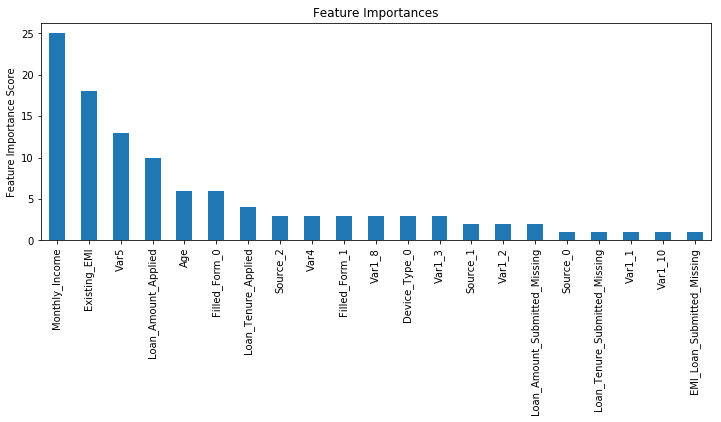

In [89]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)
modelfit(xgb1, train, test, predictors)

In [100]:
#对subsample 和 max_features 用grid search查找最好的参数
param_test1 = {
    'max_depth':[3,5,7,9],
    'min_child_weight':[1,3,5]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=140, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_depth': [3, 5, 7, 9], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [102]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.83764, std: 0.00875, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.83837, std: 0.00825, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.83716, std: 0.00818, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.84016, std: 0.00680, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.83965, std: 0.00537, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.83935, std: 0.00548, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.83570, std: 0.00587, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.83448, std: 0.00726, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.83456, std: 0.00554, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.82851, std: 0.00651, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.82955, std: 0.00580, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.83158, std: 0.00677, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 5, 'min_child_weight': 1

In [103]:
# 对于max_depth和min_child_weight查找最好的参数
param_test2 = {
    'max_depth':[4,5,6],
    'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
                                        min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=2, missing=None, n_estimators=140, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_depth': [4, 5, 6], 'min_child_weight': [4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [104]:
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.84034, std: 0.00601, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: 0.83921, std: 0.00658, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: 0.84003, std: 0.00622, params: {'max_depth': 4, 'min_child_weight': 6},
  mean: 0.84071, std: 0.00553, params: {'max_depth': 5, 'min_child_weight': 4},
  mean: 0.83935, std: 0.00548, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.83871, std: 0.00492, params: {'max_depth': 5, 'min_child_weight': 6},
  mean: 0.83926, std: 0.00302, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: 0.83717, std: 0.00483, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: 0.83732, std: 0.00601, params: {'max_depth': 6, 'min_child_weight': 6}],
 {'max_depth': 5, 'min_child_weight': 4},
 0.8407073731353547)

In [105]:
#交叉验证对min_child_weight寻找最合适的参数
param_test2b = {
    'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
                                        min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=2, missing=None, n_estimators=140, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_child_weight': [6, 8, 10, 12]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [106]:
gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_

([mean: 0.84003, std: 0.00622, params: {'min_child_weight': 6},
  mean: 0.83889, std: 0.00714, params: {'min_child_weight': 8},
  mean: 0.84004, std: 0.00661, params: {'min_child_weight': 10},
  mean: 0.83869, std: 0.00632, params: {'min_child_weight': 12}],
 {'min_child_weight': 10},
 0.840037896893036)

In [108]:
#Grid seach选择合适的gamma
param_test3 = {
    'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
                                        min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=6, missing=None, n_estimators=140, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [109]:
gsearch3.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=6, missing=None, n_estimators=140, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)


关于现在这个模型
准确率 : 0.9854
AUC 得分 (训练集): 0.788163


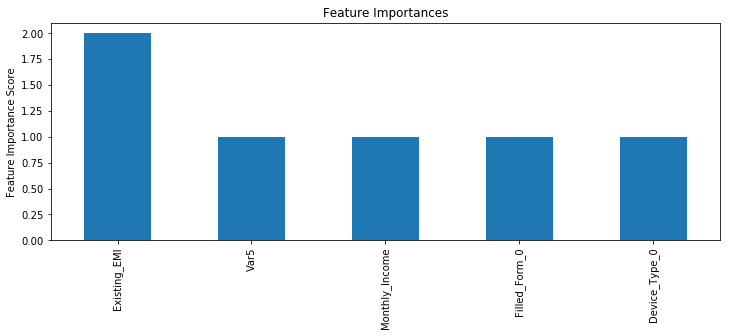

In [110]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb2 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=4,
        min_child_weight=6,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)
modelfit(xgb2, train, test, predictors)

Tune subsample and colsample_bytree

In [111]:
#对subsample 和 colsample_bytree用grid search寻找最合适的参数
param_test4 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
                                        min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=6, missing=None, n_estimators=177, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [112]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.84023, std: 0.00870, params: {'subsample': 0.6, 'colsample_bytree': 0.6},
  mean: 0.83791, std: 0.00788, params: {'subsample': 0.7, 'colsample_bytree': 0.6},
  mean: 0.83783, std: 0.00718, params: {'subsample': 0.8, 'colsample_bytree': 0.6},
  mean: 0.84060, std: 0.00698, params: {'subsample': 0.9, 'colsample_bytree': 0.6},
  mean: 0.84027, std: 0.00785, params: {'subsample': 0.6, 'colsample_bytree': 0.7},
  mean: 0.83936, std: 0.00618, params: {'subsample': 0.7, 'colsample_bytree': 0.7},
  mean: 0.83918, std: 0.00774, params: {'subsample': 0.8, 'colsample_bytree': 0.7},
  mean: 0.84055, std: 0.00668, params: {'subsample': 0.9, 'colsample_bytree': 0.7},
  mean: 0.84127, std: 0.00848, params: {'subsample': 0.6, 'colsample_bytree': 0.8},
  mean: 0.83925, std: 0.00790, params: {'subsample': 0.7, 'colsample_bytree': 0.8},
  mean: 0.84070, std: 0.00665, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.83934, std: 0.00633, params: {'subsample': 0.9, 'colsample_bytree'

tune subsample:

In [113]:
# 同上
param_test5 = {
    'subsample':[i/100.0 for i in range(75,90,5)],
    'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
                                        min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=6, missing=None, n_estimators=177, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'subsample': [0.75, 0.8, 0.85], 'colsample_bytree': [0.75, 0.8, 0.85]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [114]:
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.83922, std: 0.00800, params: {'subsample': 0.75, 'colsample_bytree': 0.75},
  mean: 0.84068, std: 0.00664, params: {'subsample': 0.8, 'colsample_bytree': 0.75},
  mean: 0.84012, std: 0.00744, params: {'subsample': 0.85, 'colsample_bytree': 0.75},
  mean: 0.83893, std: 0.00756, params: {'subsample': 0.75, 'colsample_bytree': 0.8},
  mean: 0.84070, std: 0.00665, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.84030, std: 0.00663, params: {'subsample': 0.85, 'colsample_bytree': 0.8},
  mean: 0.83961, std: 0.00628, params: {'subsample': 0.75, 'colsample_bytree': 0.85},
  mean: 0.83964, std: 0.00494, params: {'subsample': 0.8, 'colsample_bytree': 0.85},
  mean: 0.84064, std: 0.00733, params: {'subsample': 0.85, 'colsample_bytree': 0.85}],
 {'colsample_bytree': 0.8, 'subsample': 0.8},
 0.8407021719387536)

对正则化做交叉验证

In [115]:
#对reg_alpha用grid search寻找最合适的参数
param_test6 = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
                                        min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.1, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=6, missing=None, n_estimators=177, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [116]:
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.83949, std: 0.00720, params: {'reg_alpha': 1e-05},
  mean: 0.83940, std: 0.00607, params: {'reg_alpha': 0.01},
  mean: 0.84005, std: 0.00638, params: {'reg_alpha': 0.1},
  mean: 0.84062, std: 0.00775, params: {'reg_alpha': 1},
  mean: 0.81217, std: 0.01559, params: {'reg_alpha': 100}],
 {'reg_alpha': 1},
 0.8406243437179736)

In [117]:
# 换一组参数对reg_alpha用grid search寻找最合适的参数
param_test7 = {
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
                                        min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.1, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=6, missing=None, n_estimators=177, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [118]:
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

([mean: 0.83949, std: 0.00720, params: {'reg_alpha': 0},
  mean: 0.83949, std: 0.00720, params: {'reg_alpha': 0.001},
  mean: 0.83999, std: 0.00658, params: {'reg_alpha': 0.005},
  mean: 0.83940, std: 0.00607, params: {'reg_alpha': 0.01},
  mean: 0.83945, std: 0.00693, params: {'reg_alpha': 0.05}],
 {'reg_alpha': 0.005},
 0.8399870466856136)


关于现在这个模型
准确率 : 0.9854
AUC 得分 (训练集): 0.788163


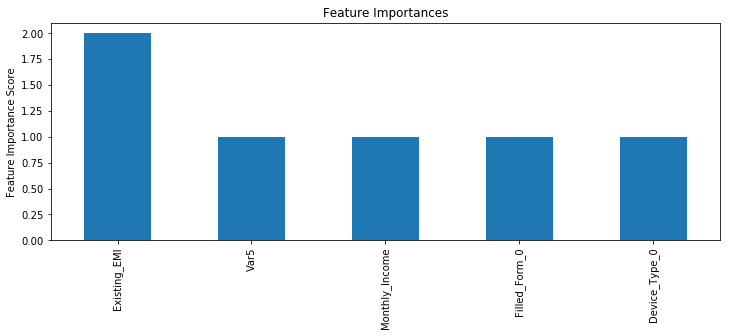

In [119]:
xgb3 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=4,
        min_child_weight=6,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.005,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)
modelfit(xgb3, train, test, predictors)


关于现在这个模型
准确率 : 0.9854
AUC 得分 (训练集): 0.788163


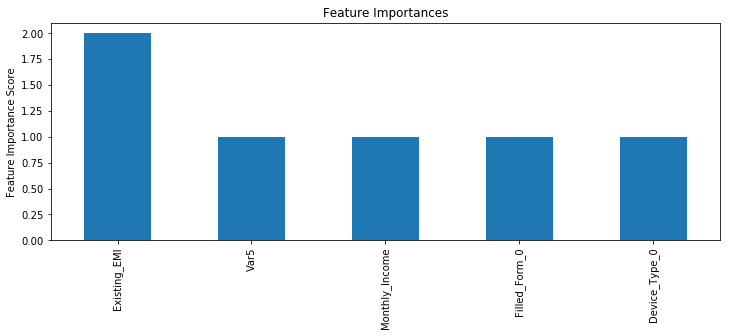

In [120]:
xgb4 = XGBClassifier(
        learning_rate =0.01,
        n_estimators=5000,
        max_depth=4,
        min_child_weight=6,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.005,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)
modelfit(xgb4, train, test, predictors)

In [121]:
import pyspark

In [122]:
from pyspark import SparkContext, SparkConf 

In [124]:
from numpy import allclose

In [125]:
from pyspark.ml.linalg import Vectors